In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


%matplotlib inline
#setting seed foor reproducability
np.random.seed(42)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\linss\micromamba\envs\geoenv\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\linss\micromamba\envs\geoenv\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\linss\micromamba\envs\geoenv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\linss\micromamba\envs\geoenv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\linss\micromamba\envs\geoenv\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\linss\micromamba\envs\geoenv\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\linss\micromamba\envs\geoenv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\linss\micromamba\envs\geoenv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.s

AttributeError: _ARRAY_API not found

In [2]:
#load in population grid info. 
PROJECT_ROOT = Path().absolute().parent
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'
PROCESSED_DATA_DIR = DATA_DIR / 'processed'
TEMP_DATA_DIR = DATA_DIR / 'temp'


population_info_raw=pd.read_csv(PROCESSED_DATA_DIR/'station_population_data.csv')
population_info_raw

,count,sum,nodata,grid_id,station_name,buffer_km,valid_pixels,nodata_pixels,total_pixels,prop_nodata,population_count
0,23,216.643463,87.0,21461,Aisa FM,20.0,23,87.0,110.0,0.790909,216.643463
1,58,700.665894,42.0,21291,Aisa FM,20.0,58,42.0,100.0,0.420000,700.665894
2,10,87.026184,111.0,21462,Aisa FM,20.0,10,111.0,121.0,0.917355,87.026184
3,80,864.314026,30.0,21292,Aisa FM,20.0,80,30.0,110.0,0.272727,864.314026
4,76,793.443115,45.0,21122,Aisa FM,20.0,76,45.0,121.0,0.371901,793.443115
...,...,...,...,...,...,...,...,...,...,...,...
9646,66,340.077698,55.0,12370,Dokolo FM,25.0,66,55.0,121.0,0.454545,340.077698
9647,51,233.072800,70.0,12200,Dokolo FM,25.0,51,70.0,121.0,0.578512,233.072800
9648,82,412.326538,39.0,12030,Dokolo FM,25.0,82,39.0,121.0,0.322314,412.326538
9649,56,270.777649,65.0,12201,Dokolo FM,25.0,56,65.0,121.0,0.537190,270.777649


             count          sum       nodata       grid_id    buffer_km  \
count  9651.000000  8708.000000  9651.000000   9651.000000  9651.000000   
mean     38.047042   302.580091    79.083100  14388.936172    23.048389   
std      21.657194   174.477512    21.854653   6034.514258     2.439239   
min       0.000000     3.802847     7.000000   6055.000000    20.000000   
25%      24.000000   200.612061    64.000000   9615.000000    20.000000   
50%      41.000000   283.750488    76.000000  11860.000000    25.000000   
75%      53.000000   381.442337    93.000000  20817.500000    25.000000   
max     114.000000  2563.534668   121.000000  26584.000000    25.000000   

       valid_pixels  nodata_pixels  total_pixels  prop_nodata  \
count   9651.000000    9651.000000   9651.000000  9651.000000   
mean      38.047042      79.083100    117.130142     0.675300   
std       21.657194      21.854653      5.815546     0.184109   
min        0.000000       7.000000    100.000000     0.057851   

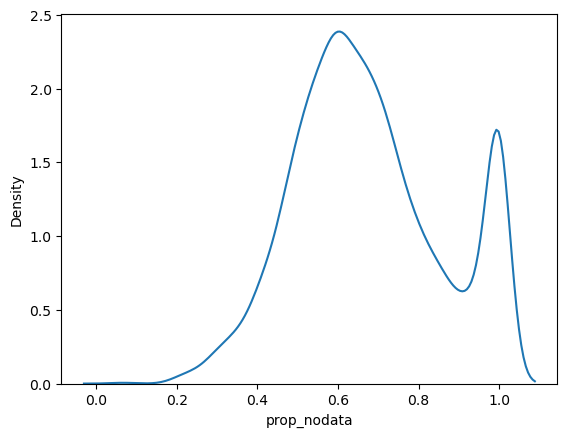

In [3]:
print(population_info_raw.describe())

sns.kdeplot(population_info_raw['prop_nodata'])
plt.show()

In [4]:
# open the gridded buffers (which has the polygons for each grid_id)
gridded_buffers_gdf=gpd.read_file(PROCESSED_DATA_DIR/'gridded_buffers_gdf.gpkg')
#load the sampling frame (the population info by grid_id)
sampling_frame=population_info_raw

#let's take the 25km buffer. 
sampling_frame_25km=sampling_frame.loc[sampling_frame['buffer_km']==25.0].copy()

#how many cells left after excluding <=0.8? 
print(sampling_frame_25km.groupby(['station_name','buffer_km']).size())



station_name  buffer_km
Aisa FM       25.0         1971
Dokolo FM     25.0         1954
Dwanwana FM   25.0         1959
dtype: int64


In [5]:
#Generate a household count. persons_per_household = 4.9  # typical household size in Rural Uganda see DHS 2020. 

len(sampling_frame_25km)
#select only the grid id and grid geos. 
sampling_frame_25km.grid_id.is_unique
#this is non-unique because 25 km for dokolo and dwawana overlap. 

#sampling_frame_25km=sampling_frame25km['grid_id', 'station_name', 'buffer_km','population_count', 'prop_nodata']


sampling_frame_25km['household_count']=sampling_frame_25km['population_count']/4.9

0.10673011556764106
628 grid cells that are uninhabited (nan values)


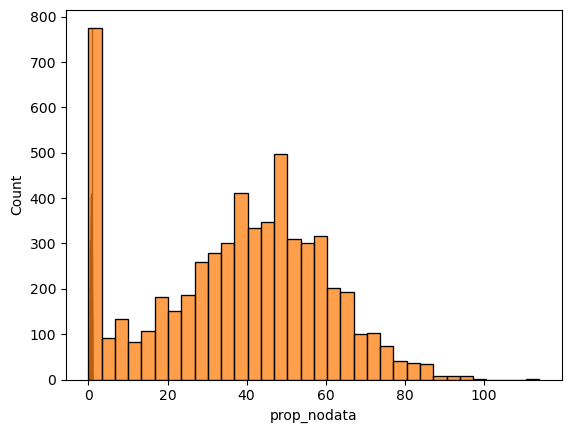

In [6]:
sns.histplot(data=sampling_frame_25km['prop_nodata'])
print(len(sampling_frame_25km.loc[sampling_frame_25km['prop_nodata']==1])/len(sampling_frame_25km))


sns.histplot(data=sampling_frame_25km['valid_pixels'])
print(sampling_frame_25km['household_count'].isna().sum(), "grid cells that are uninhabited (nan values)")



<Axes: xlabel='household_count', ylabel='Density'>

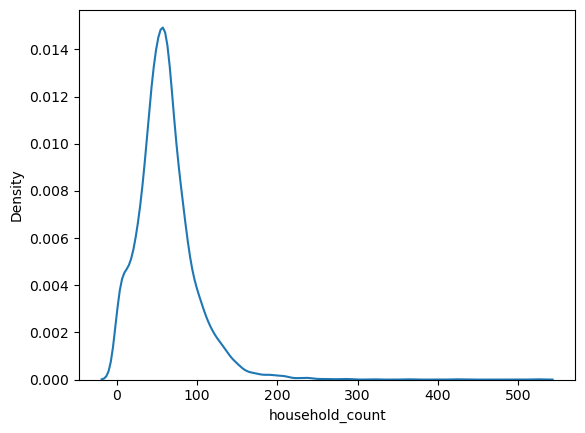

In [7]:
#what if excluding zero's (uninhabited grid cells)
sns.kdeplot(data=sampling_frame_25km['household_count'].loc[sampling_frame_25km['household_count']>0])





In [8]:
#replace nans with 0 in population count (these are uninhabited cells)
sampling_frame_25km.loc[:,'population_count']=sampling_frame_25km['population_count'].fillna(0)
#exclude the uninhabited grid cells. 
sampling_frame_25km = sampling_frame_25km[sampling_frame_25km['population_count'] > 0].copy()



print("number of duplicate grid_ids in the sampling frame by station?:", len(sampling_frame_25km[sampling_frame_25km.duplicated(subset=['grid_id', 'station_name'], keep=False)].sort_values(['grid_id', 'station_name'])))




number of duplicate grid_ids in the sampling frame by station?: 0


In [9]:
# Basic population statistics
print("Overall population statistics:")
print(sampling_frame_25km.groupby('station_name')['population_count'].describe())
print("total population persons per station in 25 km range",sampling_frame_25km.groupby('station_name')['population_count'].sum())
print("total household population per station in 25 km range",sampling_frame_25km.groupby('station_name')['household_count'].sum())

# Look at distribution
print("\nPopulation percentiles by station:")
percentiles = [0, 5, 10, 25, 50, 75, 90, 95, 100]
print(sampling_frame_25km.groupby('station_name')['population_count'].quantile(np.array(percentiles)/100))
print(sampling_frame_25km.groupby('station_name')['household_count'].quantile(np.array(percentiles)/100))

# Check how many grid cells would be excluded at different thresholds
thresholds = [0, 10, 50, 100, 200, 500]
for threshold in thresholds:
    n_excluded = len(sampling_frame_25km[sampling_frame_25km['population_count'] < threshold])
    pct_excluded = (n_excluded / len(sampling_frame_25km)) * 100
    print(f"\nThreshold {threshold}:")
    print(f"Would exclude {n_excluded} grid cells ({pct_excluded:.1f}%)")


Overall population statistics:
               count        mean         std       min         25%  \
station_name                                                         
Aisa FM       1629.0  395.123943  239.617067  3.802847  234.010559   
Dokolo FM     1805.0  258.574372  118.380828  4.137015  188.310730   
Dwanwana FM   1822.0  257.272591  118.006886  4.137015  189.742359   

                     50%         75%          max  
station_name                                       
Aisa FM       388.035828  529.129883  2563.534668  
Dokolo FM     262.608032  325.767700  1024.882324  
Dwanwana FM   260.547379  323.723579  1024.882324  
total population persons per station in 25 km range station_name
Aisa FM        643656.903162
Dokolo FM      466726.740782
Dwanwana FM    468750.661440
Name: population_count, dtype: float64
total household population per station in 25 km range station_name
Aisa FM        131358.551666
Dokolo FM       95250.355262
Dwanwana FM     95663.400294
Name: househo

In [10]:
#checking how big the population size needs to be in order to reasonably sample 12 households. 
# assuming:
interviews_needed = 12
response_rate = 0.8  # 80% of eligible households will respond
eligibility_rate = 0.8  # 80% of households are eligible (have kids? This is just an assumption)
persons_per_household = 4.9  # typical household size in Rural Uganda see DHS. 

# Calculate minimum population
min_households = interviews_needed / (response_rate * eligibility_rate)
min_population = min_households * persons_per_household

print(f"Minimum households needed: {min_households:.1f}")
print(f"Minimum population needed: {min_population:.1f}")

# Check how many grid cells meet this threshold
threshold = min_households
n_excluded = len(sampling_frame_25km[sampling_frame_25km['population_count'] < threshold])
pct_excluded = (n_excluded / len(sampling_frame_25km)) * 100
print(f"\nAt household threshold {threshold:.1f}:")
print(f"Would exclude {n_excluded} grid cells ({pct_excluded:.1f}%)")


Minimum households needed: 18.7
Minimum population needed: 91.9

At household threshold 18.7:
Would exclude 136 grid cells (2.6%)


In [ ]:
#exclude cells with < 20 households. 
sampling_frame_25km = sampling_frame_25km[sampling_frame_25km['household_count'] >=18].copy()

#sampling_frame_25km

sampling_frame_25km.to_csv(PROCESSED_DATA_DIR/'sampling_frame_25km.csv')